In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


<AxesSubplot:>

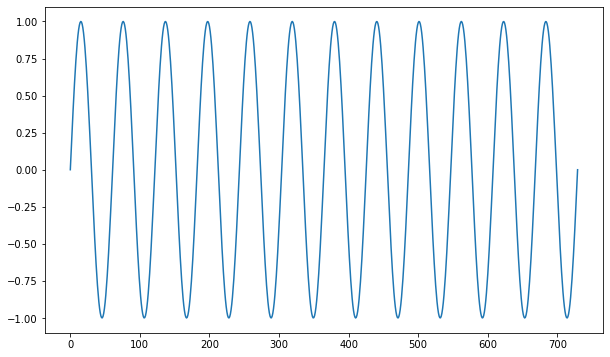

In [4]:
df['y'].plot(figsize=(10,6))

In [5]:
# 예측 시도
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [6]:
future = m.make_future_dataframe(periods=30)
forecast= m.predict(future)

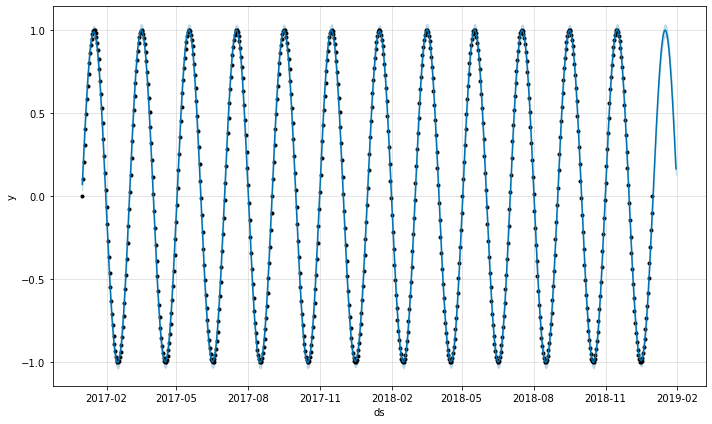

In [8]:
m.plot(forecast);

---
### 난이도 올리기

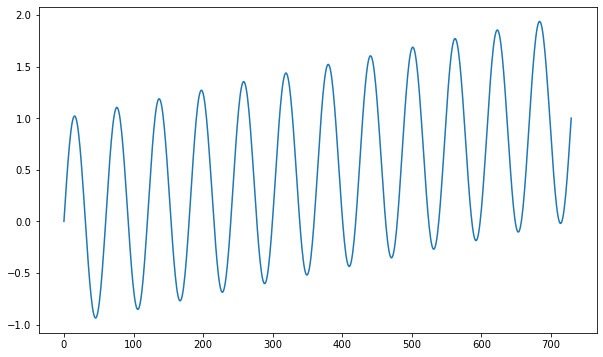

In [10]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi * 12 * time) + time

ds = pd.date_range('2017-01-01', periods=365 * 2, freq = 'D')
df = pd.DataFrame({'ds':ds, 'y' : result})

df['y'].plot(figsize=(10,6));

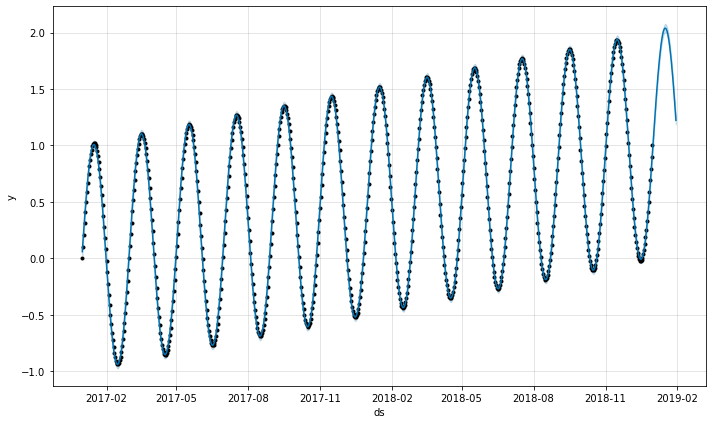

In [11]:
m = Prophet(yearly_seasonality=True , daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

---
### 이번에는 노이즈를 추가

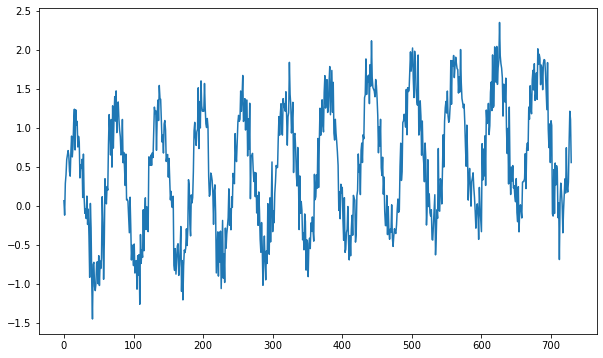

In [13]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2 * np.pi * 12 * time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01', periods=365 * 2, freq='D')
df = pd.DataFrame({'ds' : ds, 'y' : result})

df['y'].plot(figsize=(10,6));

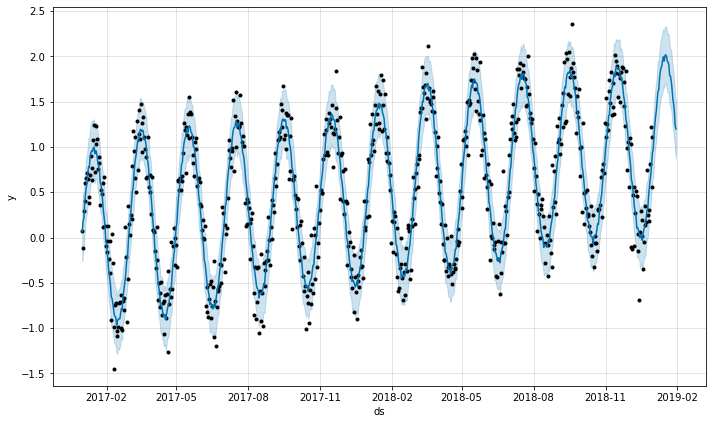

In [17]:
# 예측 진행
m = Prophet(yearly_seasonality=True, daily_seasonality=True)            # model
m.fit(df)       # model 에 df 데이터를 fit 훈련시킴

future = m.make_future_dataframe(periods=30)        # model을 가지고 이후 30일의 예측값을 dataframe화 함.
forecast = m.predict(future)            # future의 dataframe을 model이 예측함.
m.plot(forecast);        # model에 forecast 한 예측과 원 데이터를 plot 형태로 나타냄.